In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['price'] = data.target

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:

# Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

print("Linear Regression:")
print("R2:", r2_score(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("Coefficients:", lin_reg.coef_)
print("-"*50)

Linear Regression:
R2: 0.5981562649706543
RMSE: 0.7327147907107662
Coefficients: [ 0.84421321  0.11780717 -0.29912221  0.34840963 -0.00118843 -0.04169279
 -0.89819962 -0.87315331]
--------------------------------------------------


In [5]:
# Ridge Regression

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression:")
print("R2:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Coefficients:", ridge.coef_)
print("-"*50)

Ridge Regression:
R2: 0.5981728613759538
RMSE: 0.7326996597579398
Coefficients: [ 0.84414133  0.11790518 -0.29885397  0.34807698 -0.00115443 -0.04169808
 -0.89726496 -0.87220548]
--------------------------------------------------


In [6]:
# Lasso Regression (with CV)

lasso_cv = LassoCV(alphas=None, cv=5, max_iter=5000, random_state=42)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)

print("Lasso Regression:")
print("Best alpha:", lasso_cv.alpha_)
print("R2:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Coefficients:", lasso_cv.coef_)
print("-"*50)


Lasso Regression:
Best alpha: 0.002424451656188819
R2: 0.5991894674263614
RMSE: 0.7317722228663989
Coefficients: [ 0.83131621  0.11919724 -0.26568181  0.31453912 -0.         -0.03923073
 -0.8720761  -0.84525441]
--------------------------------------------------


In [7]:
#  ElasticNet Regression (with CV)

elastic_cv = ElasticNetCV(l1_ratio=[0.1,0.5,0.7,0.9,1.0], alphas=None, cv=5, max_iter=5000, random_state=42)
elastic_cv.fit(X_train, y_train)
y_pred_elastic = elastic_cv.predict(X_test)

print("ElasticNet Regression:")
print("Best alpha:", elastic_cv.alpha_)
print("Best l1 ratio:", elastic_cv.l1_ratio_)
print("R2:", r2_score(y_test, y_pred_elastic))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_elastic)))
print("Coefficients:", elastic_cv.coef_)
print("-"*50)


ElasticNet Regression:
Best alpha: 0.002424451656188819
Best l1 ratio: 1.0
R2: 0.5991894674263614
RMSE: 0.7317722228663989
Coefficients: [ 0.83131621  0.11919724 -0.26568181  0.31453912 -0.         -0.03923073
 -0.8720761  -0.84525441]
--------------------------------------------------


In [8]:
# Polynomial Regression (degree=2)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_pred_poly_lr = poly_lr.predict(X_test_poly)

print("Polynomial Regression (degree=2):")
print("R2:", r2_score(y_test, y_pred_poly_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly_lr)))
print("-"*50)

Polynomial Regression (degree=2):
R2: 0.6613963457409979
RMSE: 0.672592744086212
--------------------------------------------------


In [9]:
# Polynomial  Ridge Regression

ridge_poly = Ridge(alpha=1.0)
ridge_poly.fit(X_train_poly, y_train)
y_pred_ridge_poly = ridge_poly.predict(X_test_poly)

print("Polynomial + Ridge Regression:")
print("R2:", r2_score(y_test, y_pred_ridge_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge_poly)))
print("-"*50)

Polynomial + Ridge Regression:
R2: 0.6621589440377113
RMSE: 0.6718349152841234
--------------------------------------------------


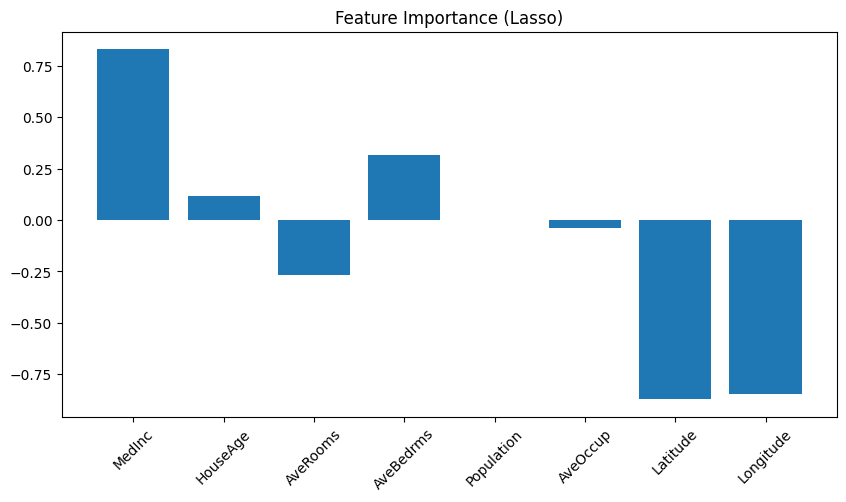

In [10]:
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_cv.coef_)), lasso_cv.coef_)
plt.xticks(range(len(df.columns[:-1])), df.columns[:-1], rotation=45)
plt.title("Feature Importance (Lasso)")
plt.show()
